**Sentiment Analysis of Comments on Reddit: the 2022 Russo-Ukranian War**

*   Name:Chuwei Chen
*   Course: SIMM71
*   Date: 15/01/2023
*   Platform: Google Colab




 

# Introduction
Sentiment Analysis has been adopted in analyzing users' discussions on social media in many aspects of politics. For example, sentiment analysis was used in analyzing Twitter data during presidential elections to predict voters' preferences and attitudes to the candidates(Budiharto & Meiliana, 2018). With sentiment analysis in Natural Language Processing, researchers can speculate social media users' sentiments towards certain political leaders or during major events.

This report analyzes the dataset "Ukraine Russia War Reddit Data" downloaded from Kaggle(https://www.kaggle.com/datasets/diyacharya/ukraine-russia-war-reddit-data). The dataset contains 16,707 entries scraped from subreddits that are relevant to the Russo-Ukrainian War in 2022. This astounding war has been the focus on social media throughout the year 2022 and elicited heated discussions, which makes it relevant to our project.

I propose two research questions for this project:
* In a sample of 100 reddit comments about the Russo-Ukrainian War, how are negative and positive comments distributed?
* How to compare the topic words in negative and positive comments?

In the notebook, I will first import and preprocess the dataset, then I will perform sentiment analysis with Hugging Face Transformers to determine whether the reddit comments related to the Russo-Ukrainian War are positive or negative. Secondly, I will create two wordcloud graphs for negative and positive comments respectively to compare the most frequent words. Finally, the results and limitations of this project will be discussed.


This notebook can be found on github(https://github.com/Chuwei-Chen/SIMM71).


#Install Libraries

In [1]:
#installing necessary libraries for nlp.
!pip install -q scikit-learn
!pip install -q transformers
!pip install -q torch

#Importing Dataset

In [2]:
#importing the raw dataset from github
import pandas as pd
url = "https://raw.githubusercontent.com/Chuwei-Chen/SIMM71/main/reddit_raw_ukraine_russia.csv"
df = pd.read_csv(url,index_col=0)
df.head()

,comments,date,post_id,comment_id
0,"Hello /u/hjgbuijhgh,\n\nThis community is focu...",2022-06-27,vlvgj4,idxd71z
1,uhm thats quite the increase. \n\n\nI also he...,2022-06-27,vlvgj4,idxdtuz
2,Poland also announced that they plan to double...,2022-06-27,vlvgj4,idxit01
3,"Remember, NATO knows more than we’re being tol...",2022-06-27,vlvgj4,idxh1fc
4,"Well done, Putin. Top 2022 salesman of NATO. \...",2022-06-27,vlvgj4,idxhl5a


#Data Preprocessing

By quickly scanning the dataset, I found some comments are posted by bots(the bots would indentify themselves by saying"**I am a bot**" at the end of the comments) and some entries display "**[removed]**" and "**[deleted]**". Therefore, I will delete the comments contains strings "I am a bot","[removed]", and "[deleted]". I will also delete urls in comments.
Considering the comments amount to 16,707, I will randomly sample 100 comments for analysis in this project.


In [3]:
#delete bot comments
df = df[df.applymap(lambda x: False if 'I am a bot' in str(x) else True)].dropna()
df = df[df.applymap(lambda x: False if "I'm a bot" in str(x) else True)].dropna()


In [4]:
#delete "removed" comments
df = df[df.applymap(lambda x: False if '[removed]' in str(x) else True)].dropna()

In [5]:
#delete "deleted" comments
df = df[df.applymap(lambda x: False if '[deleted]' in str(x) else True)].dropna()

In [6]:
#delete urls in comments
df['comments'] = df['comments'].str.replace('http\S+', '', case=False)


<ipython-input-6-49755c97c6fd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comments'] = df['comments'].str.replace('http\S+', '', case=False)


In [7]:
#sample 100 comments
comment_list = df.iloc[:,0]
comment_list_100 = comment_list.sample(n = 100)

In [8]:
#convert the panda series to DataFrame
final_data = comment_list_100.to_frame(name='comments')
final_data.reset_index(drop=True, inplace=True)
type(final_data)
final_data.head()

,comments
0,They can surrender or die.
1,Good night and good luck
2,Only after the west cut nearly all trade to Ru...
3,"Russia has a militairy base in Georgia, and Ge..."
4,*This is your daily tea break warning from Put...


#Sentiment Analysis

##Sentiment Analysis Using BERT model from Transformers

I applied the transformers model "distilbert-base-uncased-finetuned-sst-2-english" for text classification on huggingface(https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) to classify comments and generate sentiments scores. This pre-trained model contains necessary steps for text processing including tokenization, lemmatization and stemming, etc.

This model is a fintuned and distilled version of "bert-base-uncased model". The BERT model has been proved efficient(Delvin et al., 2018)

In [9]:
#import the model from transformers
from transformers import pipeline
senti_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")
final_data["pred"] = [0 if (senti_pipeline(i)[0]['label']) == "NEGATIVE" else 1 for i in final_data.iloc[:,0]]

final_data["pred"].head()

0    0
1    1
2    0
3    0
4    0
Name: pred, dtype: int64

In [10]:
#yield sentiment scores and pass them to a new column
final_data["ht_conf"] = [senti_pipeline(i)[0]['score'] for i in final_data.iloc[:,0]]
final_data["ht_conf"].head()

0    0.961554
1    0.999854
2    0.986648
3    0.978519
4    0.978303
Name: ht_conf, dtype: float64

In [11]:
final_data.head()


,comments,pred,ht_conf
0,They can surrender or die.,0,0.961554
1,Good night and good luck,1,0.999854
2,Only after the west cut nearly all trade to Ru...,0,0.986648
3,"Russia has a militairy base in Georgia, and Ge...",0,0.978519
4,*This is your daily tea break warning from Put...,0,0.978303


##Visualization

###Sentiment Bar Chart
To answer RQ1, I will create a bar chart to see the distribution of negative and positive comments in the total 100 reddit comments.

Text(0, 0.5, 'Counts')

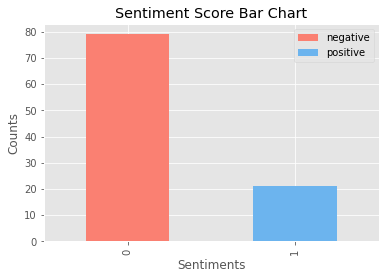

In [12]:
#draw a bar chart from matplotlib package
from matplotlib.patches import Patch
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

colours = {0: "#FA8072", 1: "#6CB4EE"}
final_data["pred"].value_counts().plot(
        kind='bar',color=final_data["pred"].replace(colours)
        ).legend(
    [
        Patch(facecolor=colours[0]),
        Patch(facecolor=colours[1])
    ], ["negative", "positive"]
)
plt.title("Sentiment Score Bar Chart")
plt.xlabel("Sentiments")
plt.ylabel("Counts")


In [ ]:
#display the amount of negative and positive comments
final_data["pred"].value_counts()

0    67
1    33
Name: pred, dtype: int64

The bar chart shows the distribution of negative and positive comments in the sample. Negative comments(77%) outnumbers the positive comments(23%) within the sample, which indicates the dominate sentiment in thie case is negative. This shows that users on Reddit do not have positive feelings in general. 

 > **Note: Because the 100 comments were randomly sampled, each time it will yield different(but similar in general) results.Please refer to my github for the bar chart I created(https://github.com/Chuwei-Chen/SIMM71/blob/main/sentiment_bar_chart1.png?raw=true).**

Here are some examples of comments in each category:


*   Negative:"Putin literally uses this argument He's also used the argument that he was attacking Nazis when he bombed a Holocaust memorial. We shouldn't give a damn about what argument Putin might make, since he's just making up whatever shit he wants anyhow."
    
*   Positive: "OK, just hand wave and call for more people to be shot and blown up, then you won't have to engage with any substantive issues!"




#Comparison of Negative and Positive comments: WordCloud

Now we look at the most frequent word in negative comments and positive comments respectively. I will create wordcloud graph for a straightforward display.

Before creating wordcloud, I will use SpaCy to preprocess the data, inlcuding tokenization, lemmatization, and stopwords removal. SpaCy contains pretrained models that can perform tokenizations, POS tags and lemmatizations(Kedia & Rasu,2020).
Ref. https://spacy.io/.

###Preprocess the data


In [13]:
#Seperate negative comments and positive comments into two dataframes
neg_df = final_data[final_data['pred'] == 0]
neg_df.reset_index(drop=True, inplace=True)
pos_df = final_data[final_data['pred'] == 1]
pos_df.reset_index(drop=True, inplace=True)

In [14]:
#lowercase the texts
neg_df['comments'] = neg_df['comments'].str.lower()
pos_df['comments'] = pos_df['comments'].str.lower()
neg_df.head()

<ipython-input-14-5f9c83753cb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df['comments'] = neg_df['comments'].str.lower()
<ipython-input-14-5f9c83753cb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['comments'] = pos_df['comments'].str.lower()


,comments,pred,ht_conf
0,they can surrender or die.,0,0.961554
1,only after the west cut nearly all trade to ru...,0,0.986648
2,"russia has a militairy base in georgia, and ge...",0,0.978519
3,*this is your daily tea break warning from put...,0,0.978303
4,it isn’t just old people that elect these type...,0,0.988781


In [30]:
#apply SpaCy model to clean the data(spacy is pre-installed in google colab)
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm") #create pretrained pipeline

###Negative Comments

In [31]:
#Data preprocessing for negative comments
token_list = []
for doc in nlp.pipe(neg_df['comments']):
    token_pos = []
    for token in doc:
        token_pos.append(
            {
                "Token text": token.text,
                "Universal POS tag set": token.pos_,
                "Fine-grained POS": token.tag_,
                "Lemma": token.lemma_,
                "belongs to stop list": token.is_stop
            }
        )
    token_list.append(token_pos)

neg_df['pos_analysis'] = token_list
neg_df.head()

<ipython-input-31-57a44d40e210>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df['pos_analysis'] = token_list


,comments,pred,ht_conf,pos_analysis,tokens
0,they can surrender or die.,0,0.961554,"[{'Token text': 'they', 'Universal POS tag set...","[surrender, die, .]"
1,only after the west cut nearly all trade to ru...,0,0.986648,"[{'Token text': 'only', 'Universal POS tag set...","[west, cut, nearly, trade, gave, billions, dol..."
2,"russia has a militairy base in georgia, and ge...",0,0.978519,"[{'Token text': 'russia', 'Universal POS tag s...","[militairy, base, georgia, ,, georgia, 2, prov..."
3,*this is your daily tea break warning from put...,0,0.978303,"[{'Token text': '*', 'Universal POS tag set': ...","[*, daily, tea, break, warning, putin, ., *]"
4,it isn’t just old people that elect these type...,0,0.988781,"[{'Token text': 'it', 'Universal POS tag set':...","[old, people, elect, types, people, run, count..."


In [41]:
#extract tokens in negative comments
all_list = []

customize_stop_words = ['ukraine','russia','war',"'",'n','russian']  # customize stopwords
##Set ukraine and russia as stopwords because obviously all comments are talking about the war itself
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

len_stop = 0   # count the number of stopwords excluded
for i in range(len(neg_df['pos_analysis'])):
    list_word_sentence = []
    # print(token_word)
    for j in neg_df['pos_analysis'][i]:
        # print(j['Token text'].lower())
        if nlp.vocab[str(j['Token text'].lower())].is_stop == True:  # if the word belongs to stopwords, then drop
          continue
        else:
          list_word_sentence.append(str(j['Token text'].lower()))
          len_stop = len_stop + 1 
    all_list.append(list_word_sentence)
neg_df["tokens"] = all_list
print("the number of stopwords that have been excluded",len_stop)
neg_df.head()

the number of stopwords that have been excluded 1662


<ipython-input-41-79acbf3c2bc6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df["tokens"] = all_list


,comments,pred,ht_conf,pos_analysis,tokens
0,they can surrender or die.,0,0.961554,"[{'Token text': 'they', 'Universal POS tag set...","[surrender, die, .]"
1,only after the west cut nearly all trade to ru...,0,0.986648,"[{'Token text': 'only', 'Universal POS tag set...","[west, cut, nearly, trade, gave, billions, dol..."
2,"russia has a militairy base in georgia, and ge...",0,0.978519,"[{'Token text': 'russia', 'Universal POS tag s...","[militairy, base, georgia, ,, georgia, 2, prov..."
3,*this is your daily tea break warning from put...,0,0.978303,"[{'Token text': '*', 'Universal POS tag set': ...","[*, daily, tea, break, warning, putin, ., *]"
4,it isn’t just old people that elect these type...,0,0.988781,"[{'Token text': 'it', 'Universal POS tag set':...","[old, people, elect, types, people, run, count..."


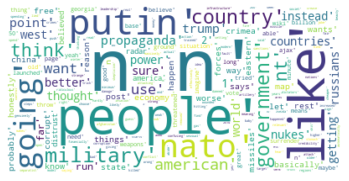

In [42]:
#Generate WordCloud chart for negative comments
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(str(token) for token in neg_df['tokens'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In negative comments, "people", "like", "military", "government", "putin", "missiles" are most frequent keywords. It is worth mentioning that "propaganda", "american", , "trump" and "nato" are interesting because they they imply that when users talk about the war, they tend to mention third-party forces during the war: NATO and the USA.

##Positive Comments

In [23]:
#Data preprocessing for positive comments
pos_list = []
for doc in nlp.pipe(pos_df['comments']):
    token_pos = []
    for token in doc:
        token_pos.append(
            {
                "Token text": token.text,
                "Universal POS tag set": token.pos_,
                "Fine-grained POS": token.tag_,
                "Lemma": token.lemma_,
                "belongs to stop list": token.is_stop
            }
        )
    pos_list.append(token_pos)

pos_df['pos_analysis'] = pos_list
pos_df.head()

<ipython-input-23-6f4af52f6936>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['pos_analysis'] = pos_list


,comments,pred,ht_conf,pos_analysis
0,good night and good luck,1,0.999854,"[{'Token text': 'good', 'Universal POS tag set..."
1,"the same thing is called ""collateral damage"" w...",1,0.954249,"[{'Token text': 'the', 'Universal POS tag set'..."
2,you do realize when russia captures land it al...,1,0.996727,"[{'Token text': 'you', 'Universal POS tag set'..."
3,putin wanted a return to the soviet union days...,1,0.996087,"[{'Token text': 'putin', 'Universal POS tag se..."
4,"amen to that, sir",1,0.981888,"[{'Token text': 'amen', 'Universal POS tag set..."


In [43]:
#extract tokens for positive comments
token_list2 = []

customize_stop_words = ['ukraine','russia','war',"'",'n','russian']  # customize stopwords
##Set ukraine and russia as stopwords because obvious all comments are talking about the war itself
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

len_stop = 0   # count the number of stopwords excluded
for i in range(len(pos_df['pos_analysis'])):
    list_word_sentence = []
    # print(token_word)
    for j in pos_df['pos_analysis'][i]:
        # print(j['Token text'].lower())
        if nlp.vocab[str(j['Token text'].lower())].is_stop == True:  # if the word belongs to stopwords, then drop
          continue
        else:
          list_word_sentence.append(str(j['Token text'].lower()))
          len_stop = len_stop + 1 
    token_list2.append(list_word_sentence)
pos_df["tokens"] = token_list2
print("the number of stopwords that have been excluded",len_stop)
pos_df.head()

the number of stopwords that have been excluded 266


<ipython-input-43-b313edea542e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df["tokens"] = token_list2


,comments,pred,ht_conf,pos_analysis,tokens
0,good night and good luck,1,0.999854,"[{'Token text': 'good', 'Universal POS tag set...","[good, night, good, luck]"
1,"the same thing is called ""collateral damage"" w...",1,0.954249,"[{'Token text': 'the', 'Universal POS tag set'...","[thing, called, "", collateral, damage, "", folk..."
2,you do realize when russia captures land it al...,1,0.996727,"[{'Token text': 'you', 'Universal POS tag set'...","[realize, captures, land, captures, funds, cap..."
3,putin wanted a return to the soviet union days...,1,0.996087,"[{'Token text': 'putin', 'Universal POS tag se...","[putin, wanted, return, soviet, union, days, ,..."
4,"amen to that, sir",1,0.981888,"[{'Token text': 'amen', 'Universal POS tag set...","[amen, ,, sir]"


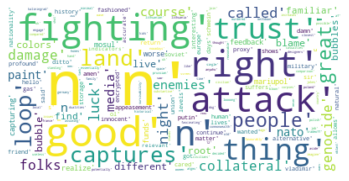

In [44]:
#generate wordcloud for positive comments
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(str(token) for token in pos_df['tokens'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In postive comments, not much constructive information is shown. Nevertheless, positive comments show different features compared to negative comments. Users in positive comments seems to talk more about "trust", "good", "attack", "right", and "fighting".

#Discussions
This report examines the sentiments within reddit comments about the Russo-Ukrainian War. Overall, the comments on Reddit show negative sentiment. Negative comments contain more controversial and relevant keywords compared to positive comments.

Due to the sample size of data in this project, the results could be biased because each time it will randomly select 100 comments from over ten thousand comments. The wordcloud did not yield much information because positive comments account for a small portion in the sample. 

Another limitation is that the model only classifies comments into two extreme categories, "negative" and "positive". In our case, it is expected to see lots of negative comments because the event is an international war. Furthermore, two categories are not enough to classify comments on social media as people sometimes act sarcastic, making it challenging to detect(Rajadesingan, Zafarani, & Liu, 2015).

Improvements for this project include adding more comments into the model, applying other pre-trained models that fit the social media data better, and using topic modelling to obtain more accurate topic words for each category.

#References
> Budiharto, W., & Meiliana, M. (2018). Prediction and analysis of Indonesia Presidential election from Twitter using sentiment analysis. Journal of Big data, 5(1), 1-10.

> Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (Version 2). arXiv. https://doi.org/10.48550/ARXIV.1810.04805

> HF Canonical Model Maintainers. (2022). distilbert-base-uncased-finetuned-sst-2-english (Version bfdd146). Hugging Face. https://doi.org/10.57967/HF/0181

> Kedia, A.,& Rasu, M. (2020). Hands-on Python Natural Language Processing: Explore tools and techniques to analyze and process text with a view to building real-world NLP applications. Packt Publishing.

> Rajadesingan, A., Zafarani, R., & Liu, H. (2015). Sarcasm Detection on Twitter. In Proceedings of the Eighth ACM International Conference on Web Search and Data Mining. WSDM 2015: Eighth ACM International Conference on Web Search and Data Mining. ACM. https://doi.org/10.1145/2684822.2685316
